In [55]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt

In [83]:
def gini_coefficient(x):
    return np.sum(np.abs(x[:, np.newaxis] - x[np.newaxis, :])) / (2 * len(x)**2 * np.average(x))

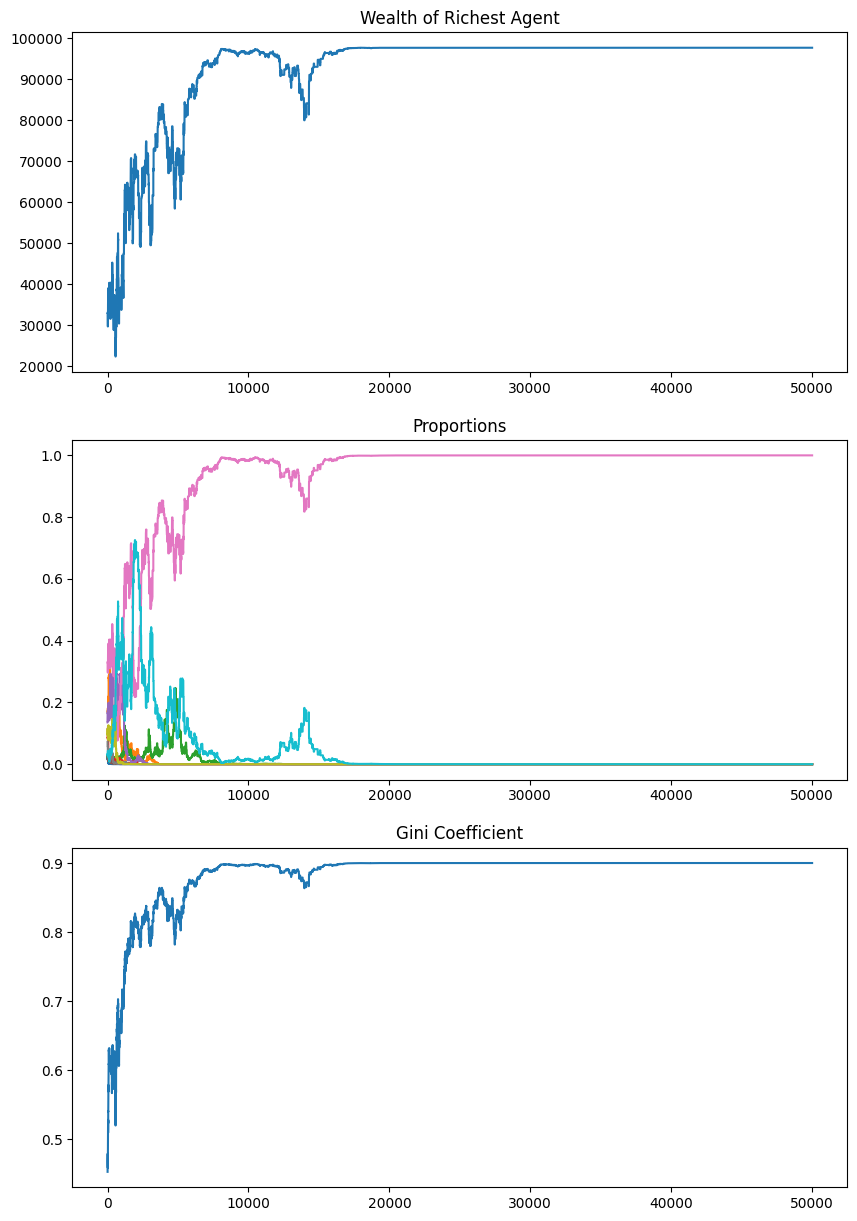

In [84]:
def yard_sale_step(arr, g=0.2):
    i, j = np.random.choice(arr.size, size=2, replace=False)
    event = np.random.choice(['gain', 'loss'])
    delta = min(arr[i], arr[j]) * g
    arr[i] += (1 if event == 'gain' else -1) * delta
    arr[j] += (1 if event == 'loss' else -1) * delta

N = 10         # agents
W = 100000     # total wealth
R = 50000      # rounds

# Initialize array
initial_values = np.random.dirichlet(np.ones(N), size=1) * W
initial_values = initial_values.astype(int)[0]

# Initialize DataFrame
df = pd.DataFrame([initial_values])

# Apply yard sale steps and append to DataFrame
for _ in range(R):
    values = df.iloc[-1].copy().values
    yard_sale_step(values)
    df = pd.concat([df, pd.Series(values).to_frame().T], ignore_index=True)

richest_wealth = []
random_wealth = []
gini_values = []

for index, row in df.iterrows():
    richest_wealth.append(row.max())
    random_wealth.append(row.sample(n=1).iloc[0])
    gini_values.append(gini_coefficient(row.values))

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(richest_wealth)
axs[0].set_title("Wealth of Richest Agent")
axs[1].plot(df.apply(lambda row: row * 1/row.sum(), axis=1))
axs[1].set_title("Proportions")
axs[2].plot(gini_values)
axs[2].set_title("Gini Coefficient")
plt.show()